In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time

In [73]:
def clean_team_name(name):
    """Remove ranking in parentheses anywhere in the team name and format it correctly."""
    name = name.strip()
    name = re.sub(r'\s*\(\d+\)', '', name)  # Remove any ranking (e.g., "Duke (3)" -> "Duke")
    name = name.replace('\xa0', ' ')  # Fix non-breaking spaces
    return name.lower().replace(" ", "-")  # Convert to lowercase and replace spaces with hyphens



def get_game_logs(team, year, completed):
    url = f"https://www.sports-reference.com/cbb/schools/{team}/men/{year}-schedule.html"
    print(url)
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate, br"
}


    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to get data for {team} {year}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the game logs table
    table = soup.find('table', {'id': 'schedule'})  
    if not table:
        print(f"No schedule found for {team} {year}")
        return None

    # Read the table into a DataFrame
    df = pd.read_html(str(table))[0]
    
    # Drop unnecessary rows and columns
    df = df.dropna(subset=['Date'])  # Remove empty rows
    df = df[['Opponent', 'Tm','Opp']]  # Keep relevant columns
    df.columns = ['opponent', 'team_score', 'opp_score']

    # Convert scores to numeric
    df['team_score'] = pd.to_numeric(df['team_score'], errors='coerce')
    df['opp_score'] = pd.to_numeric(df['opp_score'], errors='coerce')

    # Clean opponent names
    df['opponent'] = df['opponent'].apply(clean_team_name)
    team_name = clean_team_name(team.capitalize())  # Ensure proper format for comparison


    # Create winner and loser columns
    df['winner'] = df.apply(lambda row: team_name if row['team_score'] > row['opp_score'] else row['opponent'], axis=1)
    df['loser'] = df.apply(lambda row: row['opponent'] if row['team_score'] > row['opp_score'] else team_name, axis=1)

    # Now apply clean_team_name() to clean all names properly
    df['winner'] = df['winner'].apply(clean_team_name)
    df['loser'] = df['loser'].apply(clean_team_name)

    # Keep only winner and loser columns
    df = df[['winner', 'loser']]

    df = df[~df['winner'].isin(completed)]
    df = df[~df['loser'].isin(completed)]

    df.to_csv(f'results/{team}_{year}.csv', index=False)


In [74]:
with open('/Users/jackson/competitive/MarchMadness25/teams.txt', 'r') as file:
    teams = file.readlines()

completed = []
for team in teams:
    low_team = team.strip().lower().replace(" ", "-")  # Fix spaces in URLs
    get_game_logs(low_team, 2025, completed)
    completed.append(low_team)
    time.sleep(10)

https://www.sports-reference.com/cbb/schools/auburn/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/michigan-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/iowa-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/texas-am/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/michigan/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/mississippi/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/marquette/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/louisville/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/creighton/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/new-mexico/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/vcu/men/2025-schedule.html
Failed to get data for vcu 2025
https://www.sports-reference.com/cbb/schools/california-san-diego/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/yale/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/bryant/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/robert-morris/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/norfolk-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/duke/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/alabama/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/wisconsin/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/arizona/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/oregon/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/byu/men/2025-schedule.html
Failed to get data for byu 2025
https://www.sports-reference.com/cbb/schools/saint-mary's/men/2025-schedule.html
Failed to get data for saint-mary's 2025
https://www.sports-reference.com/cbb/schools/mississippi-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/baylor/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/vanderbilt/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/liberty/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/akron/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/montana/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/houston/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/tennessee/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/kentucky/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/purdue/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/clemson/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/illinois/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/ucla/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/gonzaga/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/georgia/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/utah-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/san-diego-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/mcneese-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/high-point/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/troy/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/wofford/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/southern-illinois-edwardsville/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/florida/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/st-johns-ny/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/texas-tech/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/maryland/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/memphis/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/missouri/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/kansas/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/connecticut/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/oklahoma/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/arkansas/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/drake/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/colorado-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/grand-canyon/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/unc-wilmington/men/2025-schedule.html
Failed to get data for unc-wilmington 2025
https://www.sports-reference.com/cbb/schools/nebraska-omaha/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/mount-saint-mary's/men/2025-schedule.html
Failed to get data for mount-saint-mary's 2025
https://www.sports-reference.com/cbb/schools/saint-francis-(pa)/men/2025-schedule.html
Failed to get data for saint-francis-(pa) 2025
https://www.sports-reference.com/cbb/schools/american/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/alabama-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/north-carolina/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/texas/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/san-diego-state/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://www.sports-reference.com/cbb/schools/xavier/men/2025-schedule.html


/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_93565/124249583.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [84]:
import os
import pandas as pd

# Define the directory containing the CSV files
directory = "results"

# Get all CSV files in the directory
csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".csv")]

# Read and concatenate all CSVs
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined CSV
combined_df.to_csv("all_games.csv", index=False)

print(f"Combined {len(csv_files)} CSV files into 'all_games.csv'.")


Combined 64 CSV files into 'all_games.csv'.


In [24]:
import networkx as nx
from itertools import combinations

def get_ranks(d):
    """Construct a sorted list of labels based on the PageRank vector.

    Parameters:
        d (dict(str -> float)): a dictionary mapping labels to PageRank values.

    Returns:
        (list) the keys of d, sorted by PageRank value from greatest to least.
    """
    # Return a sorted dictionary
    return sorted(d, key=d.get, reverse=True)

def pagerank(filename, epsilon=0.85):
    with open(filename, 'r', encoding="utf-8") as file:
        lines = file.readlines()

    teams = nx.DiGraph()
    for line in lines[1:]:
        game = line.strip().split(',')
        winner, loser = game[0], game[1]
        if teams.has_edge(loser, winner):
            teams[loser][winner]['weight'] += 1
        else:
            teams.add_edge(loser, winner, weight=1)


    order_dict = nx.pagerank(teams, alpha=epsilon)
    return get_ranks(order_dict), order_dict

In [25]:
order, rankings = pagerank('/Users/jackson/competitive/MarchMadness25/all_games.csv')

In [62]:
print(order)

['drake', 'florida', 'tennessee', 'alabama', 'auburn', 'kentucky', 'missouri', 'memphis', 'georgia', 'mississippi', 'liberty', 'new-mexico', 'michigan-state', 'oregon', 'texas-a&m', 'colorado-state', 'vanderbilt', 'utah-state', 'duke', 'houston', 'purdue', 'michigan', 'illinois-chicago', 'virginia-commonwealth', 'texas', 'mississippi-state', 'arkansas', 'murray-state', 'bradley', 'kansas', 'ucla', 'texas-am', 'wofford', 'illinois', 'wisconsin', 'troy', 'maryland', 'oklahoma', 'grand-canyon', 'texas-tech', 'creighton', 'california-san-diego', 'baylor', 'arizona', 'clemson', 'iowa-state', 'boise-state', 'robert-morris', 'gonzaga', "st.-john's-(ny)", 'brigham-young', 'marquette', 'connecticut', 'saint-marys-ca', 'montana', 'bryant', 'akron', 'southern-illinois-edwardsville', 'san-diego-state', 'yale', 'high-point', 'louisville', 'xavier', 'st-johns-ny', 'norfolk-state', 'arizona-state', 'mcneese-state', 'north-carolina', 'american', 'villanova', 'arkansas-state', 'ohio-state', 'minnesota'

In [26]:
rankings['brigham-young']

0.0072350742637071926

In [27]:
def versus(team1, team2):
    ranking1, ranking2 = rankings[team1], rankings[team2]
    if ranking1 > ranking2:
        return team1
    else:
        return team2

In [114]:
versus('drake', 'tennessee')

'drake'

In [64]:
filename = '/Users/jackson/competitive/MarchMadness25/all_games.csv'
with open(filename, 'r', encoding="utf-8") as file:
    lines = file.readlines()

teams = nx.DiGraph()
for line in lines[1:]:
    game = line.strip().split(',')
    winner, loser = game[0], game[1]
    if teams.has_edge(loser, winner):
        teams[loser][winner]['weight'] += 1
    else:
        teams.add_edge(loser, winner, weight=1)

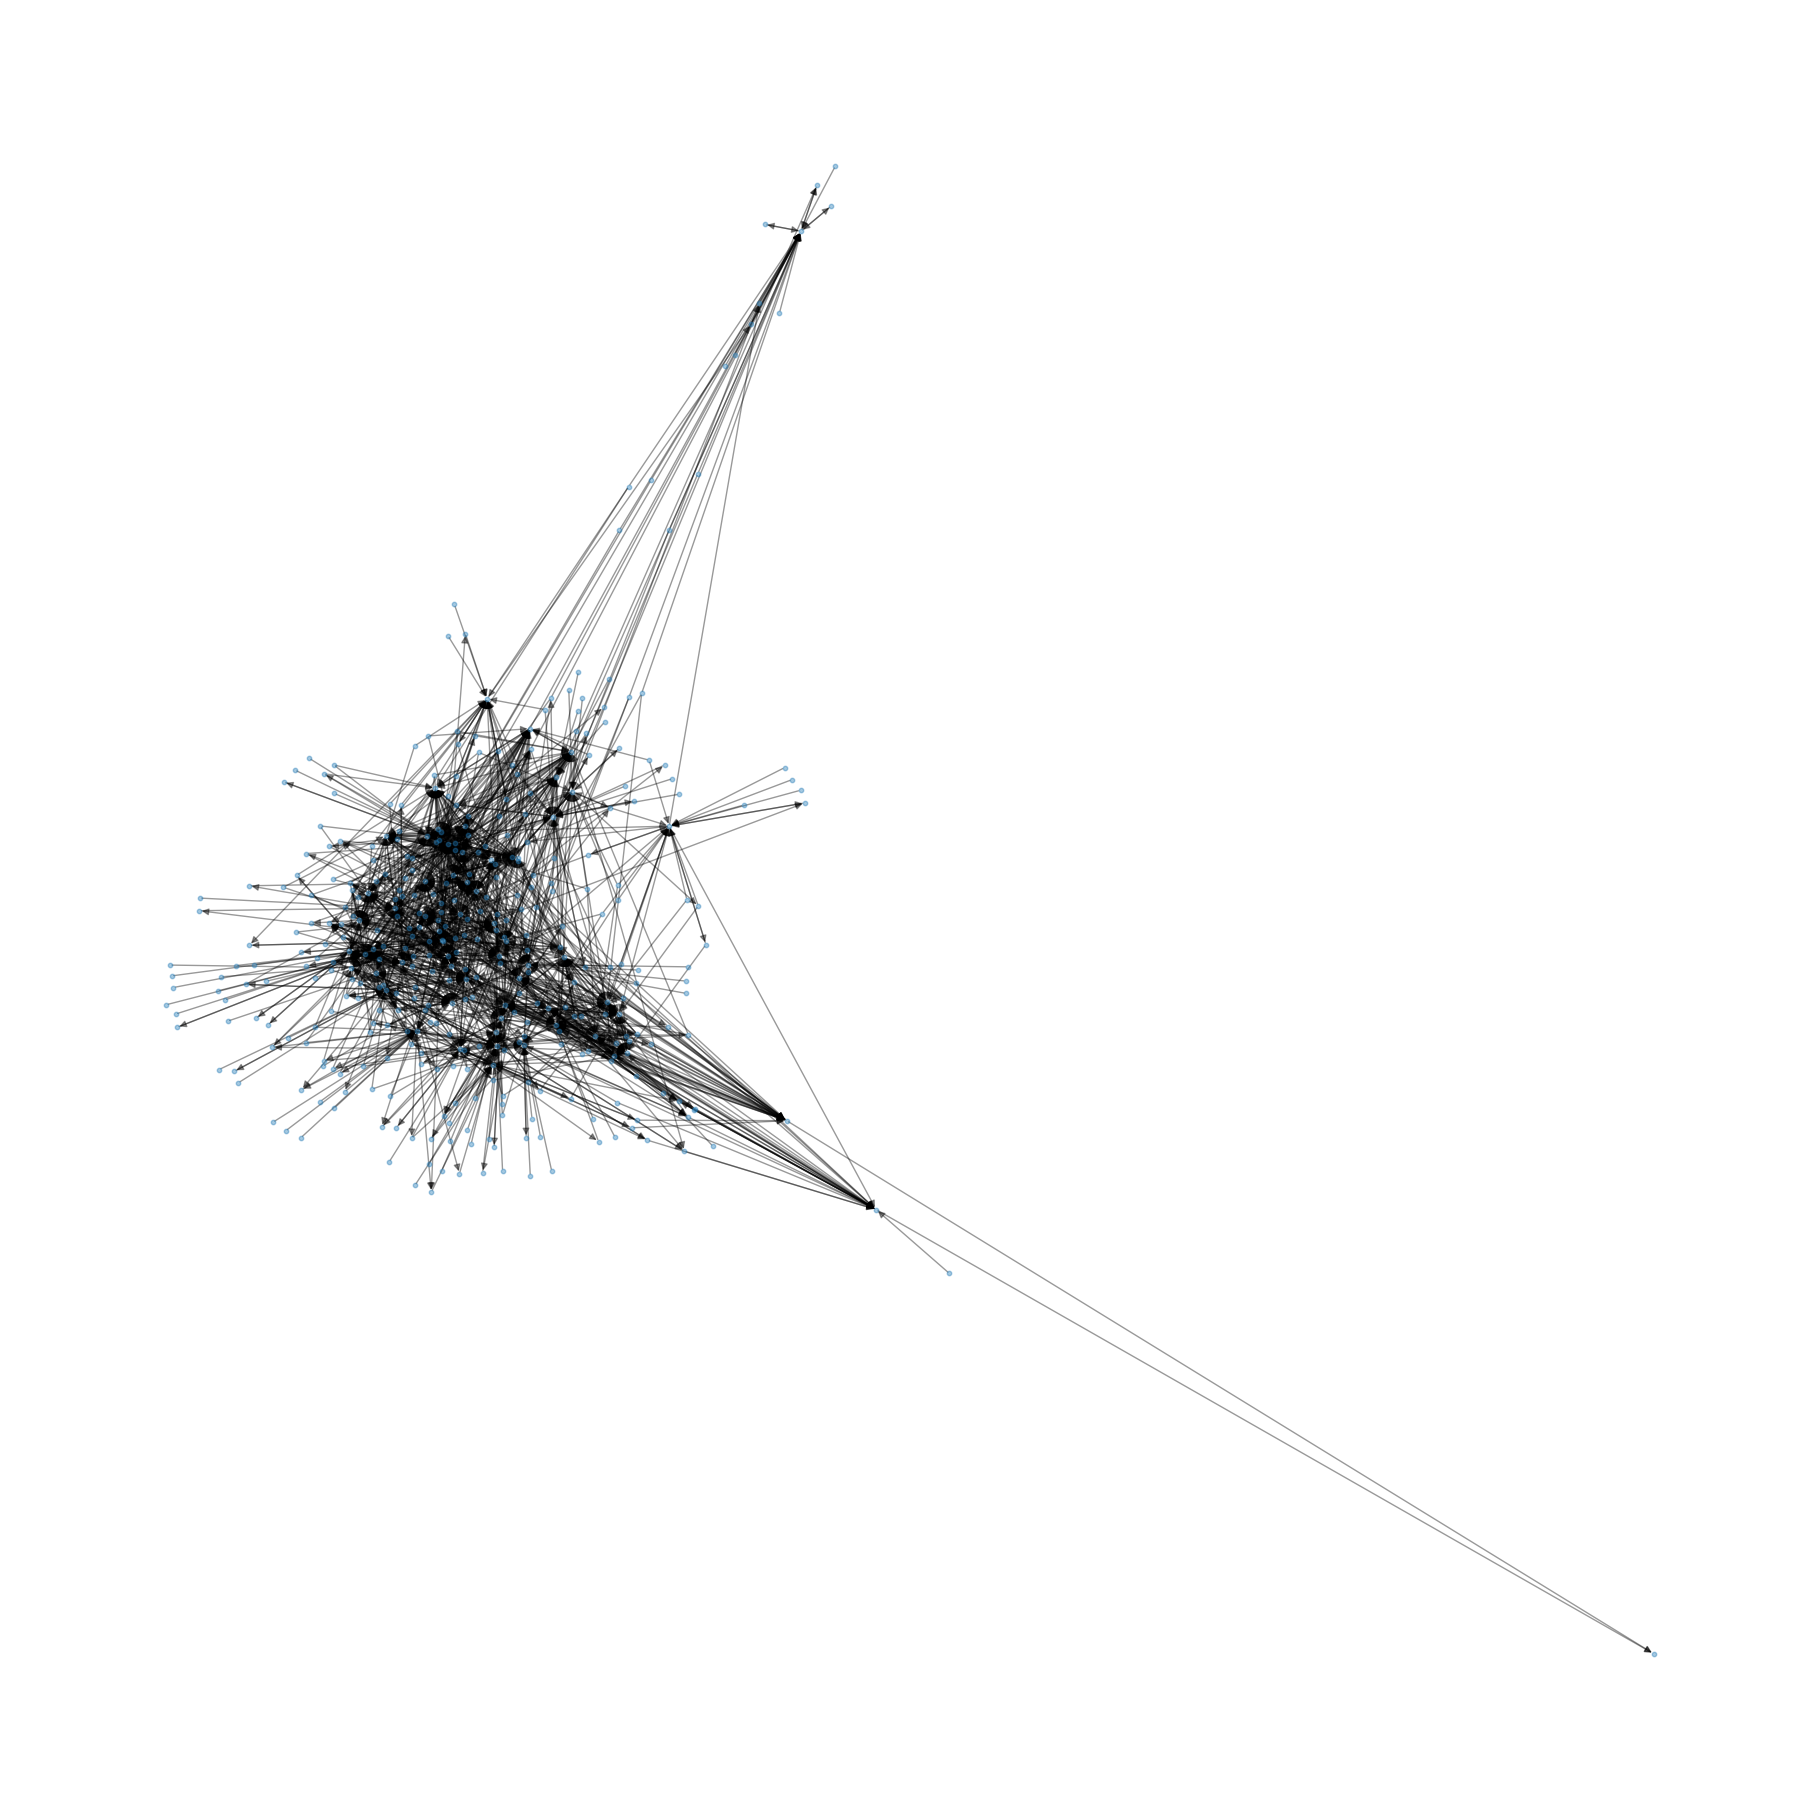

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
nx.draw(teams, node_size = 10, alpha=.4)
plt.show()
